![image.png](attachment:image.png)

In [ ]:
#!python -m pip install --upgrade pip

#!pip install tensorflow==2.3.1 

#!pip install tensorboard==2.4.1
!pip install torch 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch # YOLOv5 implemented using pytorch

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from IPython.display import Image #this is to render predictions

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 14845, done.
remote: Counting objects: 100% (190/190), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 14845 (delta 130), reused 163 (delta 113), pack-reused 14655
Receiving objects: 100% (14845/14845), 13.82 MiB | 1.24 MiB/s, done.
Resolving deltas: 100% (10220/10220), done.


In [ ]:
%cd /content/yolov5

/content/yolov5


In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 182 kB 30.8 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 1.6 MB 54.1 MB/s 


# Divide the dataset in train and val folder. 

In [ ]:
%cd /content/yolov5


/content/yolov5


# Create dataset.yaml

### move the dataset’s dataset.yaml file to the /content/yolov5/data directory. 
### This file contains information required by YOLO to train the model on the custom data. 

![image.png](attachment:image.png)

In [ ]:
!python train.py --img 415 --batch 32 --epochs 30 --data dataset.yaml --weights yolov5l.pt --cache

train: weights=yolov5l.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=32, imgsz=415, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-46-g96a71b1 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, d

## At the end of the training, two files should be saved in yolov5/runs/train/exp/weights: last.pt and best.pt. We’ll use best.pt.

## Explore the metrics recorded during training, I suggest you use TensorBoard, a very interactive exploration tool:

## Let’s explore now how confident our model is. We can plot a validation batch obtained during training and inspect the confidence score of each label

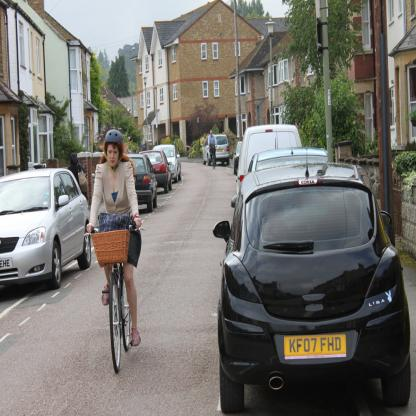

In [ ]:
Image(filename= '/content/image_000000459_jpg.rf.8350c0cbc5c5b66300e54088067bc870.jpg', width=1000)


Training losses and performance metrics are also logged to Tensorboard and a custom results.txt logfile which is plotted as results.png (below) after training completes. 

You’ll be implementing the detect.py script with the best.pt weights and image dimensions of 416x416 pixels (it’s really important to comply with that). The results will be saved to runs/detect/exp. To display the results, run the following code:

In [2]:
# lets find the bounding boxes

In [ ]:
#!python detect.py --source runs/train/exp/testimg.jpg --weights runs/train/exp/weights/best.pt --conf 0.25

!python detect.py --source '/content/image_000000459_jpg.rf.8350c0cbc5c5b66300e54088067bc870.jpg' --weights /content/yolov5/runs/train/exp2/weights/best.pt --conf 0.25

detect: weights=['/content/yolov5/runs/train/exp2/weights/best.pt'], source=/content/image_000000459_jpg.rf.8350c0cbc5c5b66300e54088067bc870.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-46-g96a71b1 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 267 layers, 46113663 parameters, 0 gradients, 107.7 GFLOPs
image 1/1 /content/image_000000459_jpg.rf.8350c0cbc5c5b66300e54088067bc870.jpg: 640x640 3 persons, 10 vehicles, 52.5ms
Speed: 0.5ms pre-process, 52.5ms inference, 1.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp4


In [3]:
# Model has detected the image " 3 persons, 10 vehicles,"